In [2]:
import sys 
sys.path.append('../src') 

import numpy as np
import matplotlib.pyplot as plt
import torch

import KPCA
from utils import get_data

In [7]:
kernels = list()
for i in range(3):
    kernels.append(KPCA.KernelPCA())



In [9]:
Re = 0.01
beta = .5
Wi = 5
eps = 1
case = 'cavity'
theta = (1.0-beta)/(Re*Wi)
X, X_mean = get_data(Re, Wi, beta, case='cavity', n_data=99, dir_path='../../npz_data')

In [ ]:
"""
1-  Create function that recive an degree and modes and return a list of reconstruction
2-  Create a function that evaluate the results
3 - Iterate for different degrees
4- Plot a graph Error x Modes for each degree
"""

In [19]:
def iter_reconstruction(X, theta, degree, modes, kernel_type = 'linear'):
    reconstructions = list()
    kernel = KPCA.KernelPCA()
    for m in modes:
        kernel.fit(X, n_components=m, kernel=kernel_type, theta = theta,degree=degree)
        Phi = kernel.transform(X, theta)
        reconstructions.append(kernel.invert_transform(Phi, theta).T)
    return reconstructions

def iter_error(X, reconstructions):
    errors = list()
    nm_X = np.linalg.norm(X)
    for r in reconstructions:
        errors.append(np.linalg.norm(X - r) / nm_X)
    return errors

In [20]:
degrees = list()
kernel_type = 'linear'
modes = [2,4,8, 16]
for i in range(4):
    rec = iter_reconstruction(X, theta, degree=i+1, modes = modes, kernel_type=kernel_type)
    err = iter_error(X, rec)

    degrees.append(err)

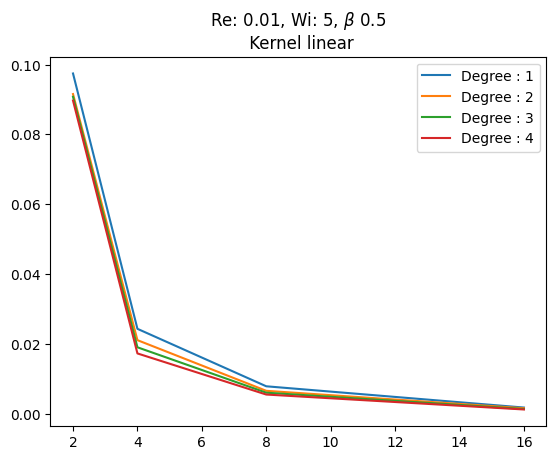

In [21]:
for i, err in enumerate(degrees):
    plt.plot(modes, err, label = f'Degree : {i+1}')

plt.title(f'Re: {Re:g}, Wi: {Wi:g}, $\\beta$ {beta:g}\n Kernel {kernel_type}')
plt.legend()

In [22]:
degrees = list()
kernel_type = 'oldroyd'
modes = [2,4,8, 16]
for i in range(4):
    rec = iter_reconstruction(X, theta, degree=i+1, modes = modes, kernel_type=kernel_type)
    err = iter_error(X, rec)

    degrees.append(err)

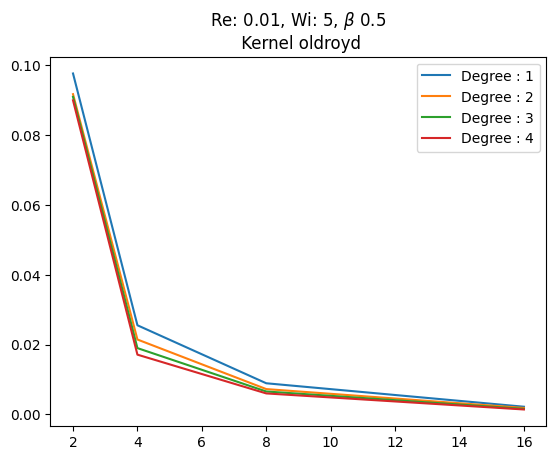

In [23]:
for i, err in enumerate(degrees):
    plt.plot(modes, err, label = f'Degree : {i+1}')

plt.title(f'Re: {Re:g}, Wi: {Wi:g}, $\\beta$ {beta:g}\n Kernel {kernel_type}')
plt.legend()